In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import seaborn as sns

pd.options.display.max_columns = None
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 150

In [6]:
X_train, X_ivs, y_train, col_names = pickle.load(open("../data/drd2_data.pickle", "rb"))
X_train = pd.DataFrame(X_train, columns=col_names)

In [14]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

alphas = np.logspace(-4, 4, 20)
coefs_list = []

D_cols = [col for col in X_train.columns if "D" in col]

ct = ColumnTransformer([("scale", MinMaxScaler(), D_cols)], remainder="passthrough")
pipe = Pipeline([("ct", ct), ("lasso", Lasso())])


for alpha in alphas:
    pipe.steps[1][1].set_params(alpha=alpha)
    pipe.fit(X_train, y_train)
    coefs = pipe.steps[1][1].coef_
    coefs_list.append(coefs)

In [20]:
coef_df = pd.DataFrame(coefs_list)
coef_df.columns = [f"X{i}" for i in range(0, coef_df.shape[1])]
coef_df["alpha"] = alphas

coef_df

X0   X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12       X13  \
0  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.084635   
1   0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.000000   
2   0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.000000   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

    X14  X15  X16  X17       X18  X19       X20  X21  X22       X23  X24  X25  \
0   0.0  0.0  0.0  0.0  0.077571  0.0 -0.032921 -0.0  0.0 -0.175036  0.0 -0.0   
1   0.0  0.0  0.0  0.0  0.000000  0.0 -0.009370 -0.0 -0.0 -0.102614  0.0 -0.0   
2   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000 -0.0 -0.0 -0.000000  0.0 -0.0   
3   0.0  0.0  0.0  0.0  0.000000  0.0 -0.000000  0.0 -0.0 -0.000000  0.0  0.0   
4   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
5   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
6   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
7   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
8   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
9   0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
10  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
11  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
12  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
13  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
14  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
15  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
16  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
17  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
18  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   
19  0.0  0.0  0.0 -0.0  0.000000  0.0 -0.000000  0.0  0.0 -0.000000  0.0  0.0   

         X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
0   0.050175  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0   
1   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0   
4   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0   
5   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0   
6   0.000000  0.0  0.0  0.0  0.0  

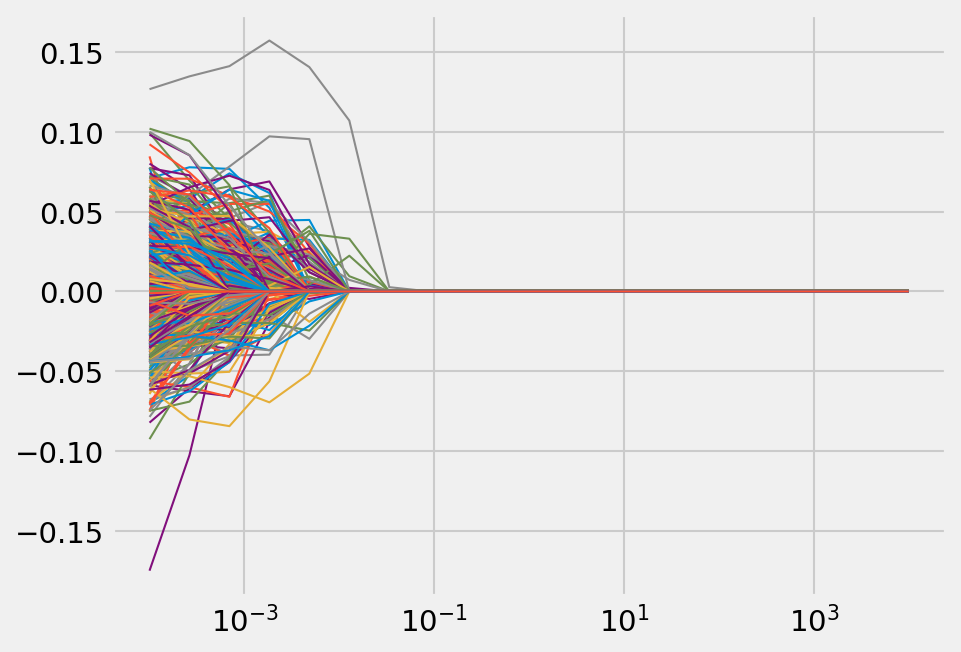

In [22]:
for col in coef_df.columns[:-1]:
    plt.plot(alphas, coef_df[col], linewidth=1)

plt.xscale("log")
plt.show()

In [105]:
from sklearn.model_selection import GridSearchCV

# optimizing Lasso

gs = GridSearchCV(
    pipe,
    {"lasso__alpha": np.logspace(-4, 4, 10)},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
    return_train_score=True,
)

gs_scores = gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.182) total time=   8.7s
[CV 2/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.184) total time=  10.2s
[CV 3/5] END lasso__alpha=0.0001;, score=(train=-0.137, test=-0.181) total time=   9.8s
[CV 4/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.180) total time=   8.5s
[CV 5/5] END lasso__alpha=0.0001;, score=(train=-0.135, test=-0.187) total time=  10.7s
[CV 1/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.181, test=-0.185) total time=   1.5s
[CV 2/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.196) total time=   1.3s
[CV 3/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.194) total time=   1.3s
[CV 4/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.192) total time=   1.2s
[CV 5/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.177, test=-0.196) total ti

<Figure size 1500x750 with 0 Axes>

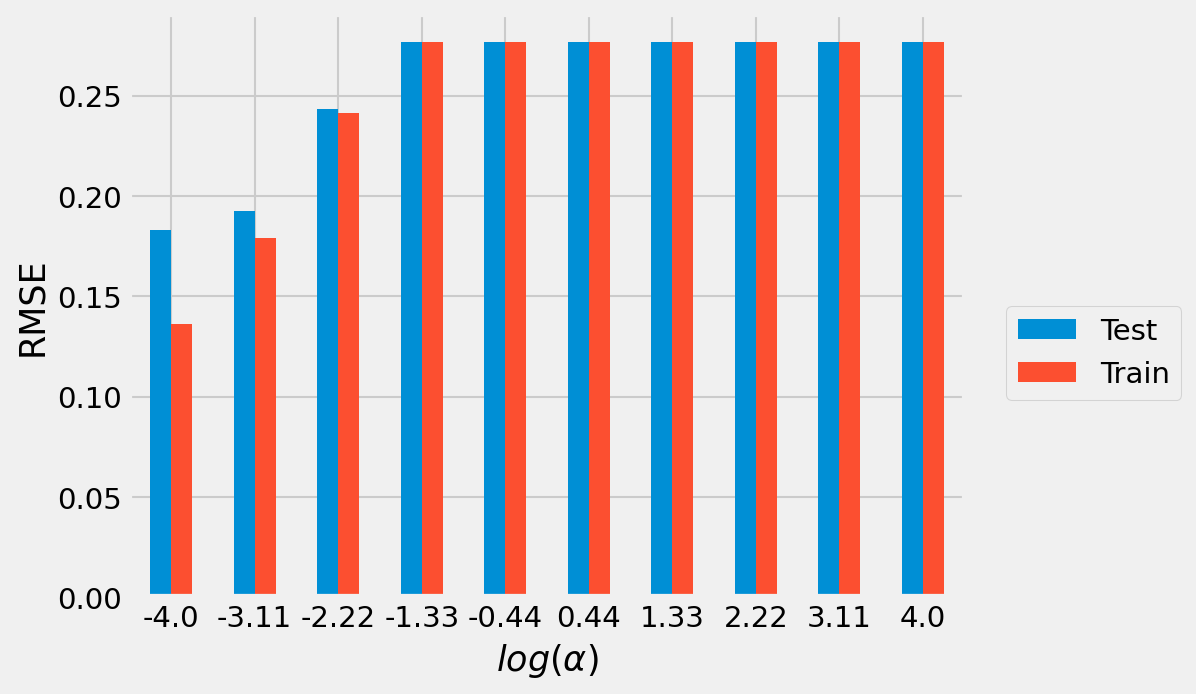

In [106]:
gs_scores_df = pd.DataFrame(gs_scores.cv_results_)
fig = plt.figure(figsize=(10, 5))
gs_scores_df[
    ["param_lasso__alpha", "mean_test_score", "mean_train_score"]
].abs().plot.bar(x="param_lasso__alpha")
plt.xlabel(r"$log(\alpha)$")
plt.xticks(
    ticks=np.arange(0, 10),
    labels=[i for i in np.linspace(-4, 4, 10).round(2)],
    rotation=0,
)
plt.ylabel("RMSE")

# get the legend to the side
plt.legend(
    bbox_to_anchor=(1.05, 0.5),
    loc="upper left",
    borderaxespad=0,
    labels=["Test", "Train"],
)

In [108]:
alphas

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [56]:
coefficients = gs.best_estimator_.named_steps["lasso"].coef_
importance = np.abs(coefficients)
feats = np.array(col_names)
len(feats[importance > 0.1])

3